In [2]:
import numpy as np
from scipy.special import hyp1f1
from scipy import integrate
from scipy.sparse import spdiags
from scipy.sparse.linalg import eigs
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import time as tm
from math import factorial

from __future__ import division

%matplotlib inline

# Defino la funcion de onda radial

In [11]:
def R1F1(n,l,z,r):
    rho = 2 * r * z / n
    rnum = (2 * z / n)**3 * factorial(n + l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = np.sqrt(rnum/rden)
    rfunc = (rho)**l * np.exp(-rho/2) * hyp1f1(-n+l+1, 2*l+2, rho)
    R = rnorm * rfunc
    return R

# Defino los vectores para el plot

In [4]:
nlen = 500
rmax = 10.0
rmin = 0.0
r = np.linspace(rmin,rmax,nlen)

# Plot para n = 1, l = 0, Z = 4

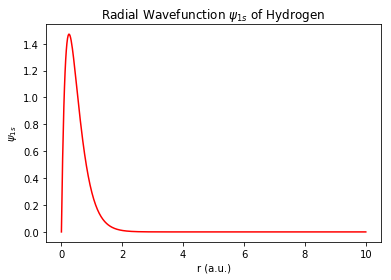

In [5]:
psi_1 = R1F1(1,0,4,r)
plt.plot(r, r*psi_1,'r')
plt.title("Radial Wavefunction $\psi_{1s}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{1s}$")
plt.show()

# Plot para n = 2, l = 1, Z = 4

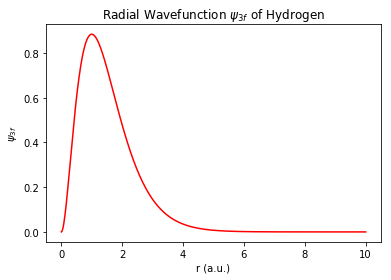

In [6]:
psi_2 = R1F1(2,1,4,r)
plt.plot(r, r*psi_2,'r')
plt.title("Radial Wavefunction $\psi_{3f}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{3f}$")
plt.show()

# Chequeo ortonormalidad

In [7]:
integrate.quad(lambda r:(r**2*R1F1(2,1,4,r)*R1F1(1,0,4,r)), 0, float('inf'))

(0.48384982573494933, 1.3072126370537772e-08)

- La parte radial no es ortogonal porque estoy en distintos niveles de energia

In [8]:
integrate.quad(lambda r:(r**2*R1F1(2,1,4,r)**2), 0, float('inf'))

(0.9999999999999999, 1.3877796942138986e-08)

In [9]:
integrate.quad(lambda r:(r**2*R1F1(1,0,4,r)**2), 0, float('inf'))

(1.0, 1.2956640677365438e-08)

- Las funciones estan normalizadas

# Calculo valores medios de r^k

In [10]:
rMean_1 = []
rMean_2 = []
exponents_list = [exp for exp in range(-3,4) if exp is not 0]

for i in exponents_list:
    rMean_1.append(integrate.quad(lambda r:(r**(2+i)*R1F1(2,1,4,r)**2), 0, float('inf')))
    rMean_2.append(integrate.quad(lambda r:(r**(2+i)*R1F1(1,0,4,r)**2), 0, float('inf')))

print "Termino 1: (n = 2, l = 1, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_1[i][0],rMean_1[i][1])

print "Termino 2: (n = 1, l = 0, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_2[i][0],rMean_2[i][1])

Termino 1: (n = 2, l = 1, Z = 4)
< r^(-3) > = 2.6667; error = 2.45e-11
< r^(-2) > = 1.3333; error = 1.26e-09
< r^(-1) > = 1.0000; error = 5.38e-10
< r^(1) > = 1.2500; error = 1.52e-08
< r^(2) > = 1.8750; error = 8.38e-10
< r^(3) > = 3.2812; error = 5.31e-09
Termino 2: (n = 1, l = 0, Z = 4)
< r^(-3) > = 8988.6307; error = 1.60e+03
< r^(-2) > = 32.0000; error = 9.02e-10
< r^(-1) > = 4.0000; error = 1.76e-09
< r^(1) > = 0.3750; error = 8.38e-09
< r^(2) > = 0.1875; error = 3.69e-09
< r^(3) > = 0.1172; error = 8.27e-10


/home/fakux/.local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


- Se puede ver que para el termino con l = 0, el valor r^-3 explota. Esto es asi porque el l = 0 neutraliza el termino de rho^l ~ r^l de la R_{nl}

# Kato

In [3]:
from scipy.misc import derivative

# Para el termino con l = 0

In [12]:
derivative(lambda r: R1F1(1,0,4,r), 0, dx = 1e-10) / R1F1(1,0,4,0)

-4.000000330961484

# Para el termino con l = 1

In [13]:
print derivative(lambda r: R1F1(2,1,4,r), 0, dx = 1e-10) / R1F1(2,1,4,0)

inf


/home/fakux/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


- La funcion con l = 1 se anula en el origen

# Openheimmer

In [14]:
from scipy.special import sph_harm as Yml

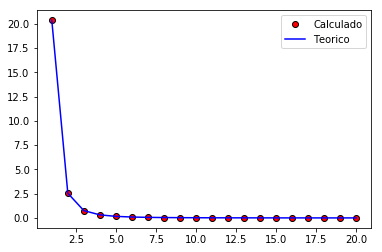

In [15]:
ns = np.arange(1,21)
y = np.zeros(len(ns))
Z = 4

for i,n in enumerate(ns):
    y[i] = np.abs(R1F1(n,0,Z,0)*Yml(0,0,0,0))**2

plt.plot(ns,y,'ro',mec='k',label = 'Calculado')
plt.plot(ns,(Z/ns)**3/np.pi,'b',label = 'Teorico')
plt.legend(loc = 'best')
plt.show()

- Obtuve lo esperado por Openheimmer

# Virial

In [16]:
ur = lambda r: R1F1(1,0,Z,r)*r
Tfunc = lambda r: -0.5*derivative(ur, r, dx=1e-5, n=2)*ur(r)
Vfunc = lambda r: -Z/r*ur(r)**2

In [17]:
T = integrate.quad(Tfunc,0,np.inf)
V = integrate.quad(Vfunc,0,np.inf)
E_1 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -7.99999997699
<V>/<T> = -1.99999999425


In [18]:
l = 1
ur = lambda r: R1F1(2,l,Z,r)*r
Tfunc = lambda r: (-0.5*derivative(ur, r, dx=1e-5, n=2))*ur(r)+l*(l+1)/(2*r**2)*ur(r)**2
Vfunc = lambda r: (-Z/r)*ur(r)**2

In [19]:
T = integrate.quad(Tfunc,0,np.inf)
V = integrate.quad(Vfunc,0,np.inf)
E_2 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -1.99999971016
<V>/<T> = -1.99999971016


/home/fakux/.local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


# Correcciones de estructura fina

# Soluciones Numericas
### Diferencias finitas

In [4]:
# usando matrices sparse
def H_matriz_sp(ri,rf,N,Z,l):
    r = np.linspace(ri,rf,N)
    h = (rf-ri)/float(N)
    
    diag_der2 = np.ones((3,N))
    diag_der2[:,1] = -2 * diag_der2[:,1]
    diag_der2 = diag_der2/(-2*h**2)
    diag_cent = l*(l+1)/r**2
    T_matriz = spdiags(diag_der2,np.array([-1,0,1]),N,N) + spdiags(diag_cent,0,N,N)
    
    diag_V = -Z/r
    V_matriz = spdiags(diag_V,0,N,N)
    
    return T_matriz+V_matriz, r

In [5]:
# usando numpy
def H_matriz(ri,rf,N,Z,l):
    r = np.linspace(ri,rf,N)
    h = (rf-ri)/float(N)
    
    offDiag_der2 = np.ones(len(r)-1)
    diag_cent = l*(l+1)/r**2
    T_matriz = (np.diag(offDiag_der2,-1) - 2*np.eye(N,dtype=float) + np.diag(offDiag_der2,1))/(-2*h**2) \
                + np.diag(diag_cent)
    
    diag_V = -Z/r
    V_matriz = np.diag(diag_V)
    
    return T_matriz+V_matriz, r

### Solucion para el 1s (n = 1, l = 0, Z = 4)
- Voy a tomar 2 casos, cada uno con $r_{min}$ mas cercano a cero que el otro

In [24]:
Z = 4
rmin = 0.001
rmax = 3.0
npuntos = 2000
l = 0
H, r = H_matriz(rmin,rmax,npuntos,Z,l)

In [25]:
# E son las energias, v las respectivas funciones de onda 
# sin normalizar como columnas de una matriz v de autovectores
E, v = eigh(H)
E[np.where(E<0)]

array([-8.05744342, -1.94984354])

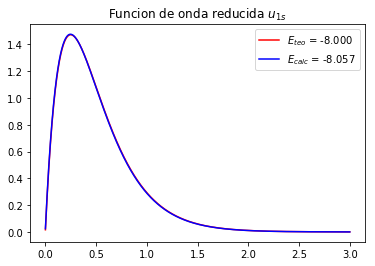

In [32]:
j = 0 # indice que maneja la el autovector a usar
n = 1 # numero cuantico ppal
sgn = -1 # manejo el signo porque a veces dan al reves las cosas

# normalizo las funciones de onda al intervalo que uso
w1s_teo = r*R1F1(n,l,4,r)/np.sqrt(np.trapz((r*R1F1(n,l,4,r))**2,r))
w1s_calc = v[:,j]/np.sqrt(np.trapz(v[:,j]**2,r))*sgn
# plotteo
plt.plot(r,w1s_teo,'r',label = '$E_{teo}$'+' = {:.3f}'.format(-Z**2/(2*n**2)))
plt.plot(r,w1s_calc,'b',label = '$E_{calc}$'+' = {:.3f}'.format(E[j]))
plt.title("Funcion de onda reducida $u_{1s}$")
plt.legend(loc='best')

- La funcion de onda da similar pero las energias dan pesimas, entonces pruebo con $r_{min}$ mas alejado

In [14]:
rmin = 0.5
H, r = H_matriz(rmin,rmax,npuntos,Z,l)

In [15]:
# E son las energias, v las respectivas funciones de onda 
# sin normalizar como columnas de una matriz v de autovectores
E, v = eigh(H)
E[np.where(E<0)]

array([-1.94140722])

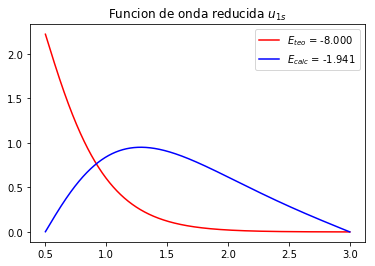

In [17]:
j = 0 # indice que maneja la el autovector a usar
n = 1 # numero cuantico ppal
sgn = -1 # manejo el signo porque a veces dan al reves las cosas

# normalizo las funciones de onda al intervalo que uso
w1s_teo = r*R1F1(n,l,4,r)/np.sqrt(np.trapz((r*R1F1(n,l,4,r))**2,r))
w1s_calc = v[:,j]/np.sqrt(np.trapz(v[:,j]**2,r))*sgn
# plotteo
plt.plot(r,w1s_teo,'r',label = '$E_{teo}$'+' = {:.3f}'.format(-Z**2/(2*n**2)))
plt.plot(r,w1s_calc,'b',label = '$E_{calc}$'+' = {:.3f}'.format(E[j]))
plt.title("Funcion de onda reducida $u_{1s}$")
plt.legend(loc='best')

- Puedo ver que cuanto mas me acerco al cero con $r_{min}$, mas parecida da la funcion de onda, pero mas distinta da la energia. Cuanto mas lejos estoy de cero, mejor da la energia pero peor la funcion de onda. Esto es asi por las condiciones de contorno que estan implicitas en la resolucion del problema, que imponen que el $w_{1s}(r_{min}) = 0 = w_{1s}(r_{max})$.

### Solucion para el 2p (n = 2, l = 1, Z = 4)


In [18]:
Z = 4
rmin = 0.01
rmax = 8.0
npuntos = 2000
l = 1
H, r = H_matriz(rmin,rmax,npuntos,Z,l)

In [19]:
# E son las energias, v las respectivas funciones de onda 
# sin normalizar como columnas de una matriz v de autovectores
E, v = eigh(H)
E[np.where(E<0)]

array([-1.21892387, -0.62135083, -0.22398204])

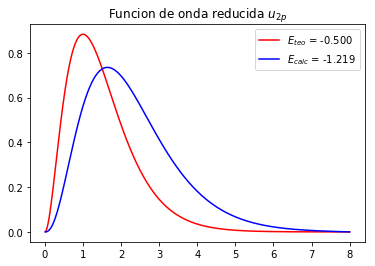

In [20]:
j = 0 # indice que maneja la el autovector a usar
n = 2 # numero cuantico ppal
sgn = -1 # manejo el signo porque a veces dan al reves las cosas

# normalizo las funciones de onda al intervalo que uso
w1s_teo = r*R1F1(n,l,4,r)/np.sqrt(np.trapz((r*R1F1(n,l,4,r))**2,r))
w1s_calc = v[:,j]/np.sqrt(np.trapz(v[:,j]**2,r))*sgn
# plotteo
plt.plot(r,w1s_teo,'r',label = '$E_{teo}$'+' = {:.3f}'.format(-Z/(2*n**2)))
plt.plot(r,w1s_calc,'b',label = '$E_{calc}$'+' = {:.3f}'.format(E[j]))
plt.title("Funcion de onda reducida $u_{2p}$")
plt.legend(loc='best')

# Funcion de onda en otras bases

#### Slater

In [35]:
def Slater_base(N,ksi,r):
    return (2*ksi)**(N+0.5)*r**(N-1)*np.exp(-ksi*r)/np.sqrt(factorial(2*N))

def Slater_coeff(n,M,l):
    anum = (-1)**(M-1-l)*np.sqrt(factorial(n-l-1)*(factorial(n+l))*factorial(2*M))
    aden = np.sqrt(2*n)*factorial(M-l-1)*factorial(n-M)*factorial(M+l)
    return anum/aden

def Rnl_Slater(n,l,Z,r):
    R = 0
    for M in range(l+1,n+1):
        R = R + Slater_coeff(n,M,l)*Slater_base(M,Z/n,r)
    return R
    

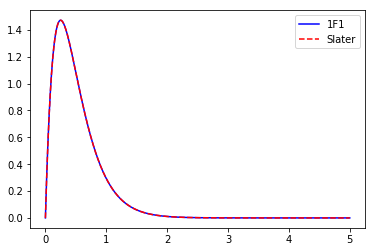

In [34]:
r = np.linspace(0,5,1000)
plt.plot(r, r*R1F1(1,0,4,r), 'b', label="1F1")
plt.plot(r, r*Rnl_Slater(1,0,4,r), 'r--', label='Slater')
plt.legend(loc='best')

# Expansiones en Slaters

In [51]:
def Sij(i,j,alpha):
    return integrate.quad(lambda r: Slater_base(i+1,alpha,r)*Slater_base(j+1,alpha,r),0,np.inf)[0]

def Overlap_Slater(N_Slat,alpha):
    M_overlap = np.zeros((N_Slat,N_Slat))
    for i in range(N_Slat):
        for j in range(i,N_Slat):
            S = Sij(i,j,alpha)
            M_overlap[i,j] = S
            M_overlap[j,i] = S            
    return M_overlap
    


In [75]:
n = 3
l = 1
Z = 4

N_Slat = 3
# Overlap
S = Overlap_Slater(N_Slat, Z/n)

B = np.zeros(N_Slat)

for i in range(N_Slat):
    B[i] = integrate.quad(lambda r: R1F1(n,l,Z,r)*Slater_base(i+1,Z/n,r),0,np.inf)[0]

In [76]:
Ci = np.linalg.solve(S,B)
Ci

array([-1.23651089e-14,  1.63299316e+00, -2.23606798e+00])

In [77]:
r = np.linspace(0,10,1000)
wave = 0
for i in range(N_Slat):
    wave = wave + Ci[i]*Slater_base(i+1,Z/n,r)

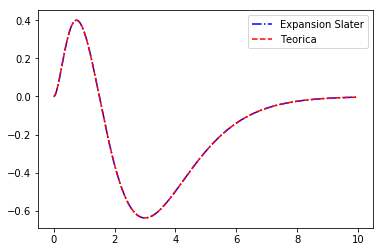

In [78]:
plt.plot(r,r*wave,'b-.',label = 'Expansion Slater')
plt.plot(r,r*R1F1(n,l,Z,r), 'r--' ,label = 'Teorica')
plt.legend(loc='best')
plt.show()